In [2]:
import os, pandas as pd, numpy as np

In [4]:
os.chdir("C:\\Users\\Home\\Downloads")

In [6]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [7]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [10]:
NAG = df[df['state']==13]

In [12]:
NAG.isnull().sum().sort_values(ascending = False)

soyabean_q        1024
soyabean_v        1024
Meals_School      1011
Meals_Employer    1006
Meals_Others       949
                  ... 
carrot_q             0
radish_q             0
brinjal_q            0
tamato_q             0
fv_tot               0
Length: 384, dtype: int64

In [14]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [16]:
NAG_new = NAG[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [18]:
NAG_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       1
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
dtype: int64

In [20]:
NAG_clean = NAG_new.copy()

In [22]:
NAG_clean.loc[:, 'Meals_At_Home'] = NAG_clean['Meals_At_Home'].fillna(NAG_new['Meals_At_Home'].mean())

In [24]:
NAG_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

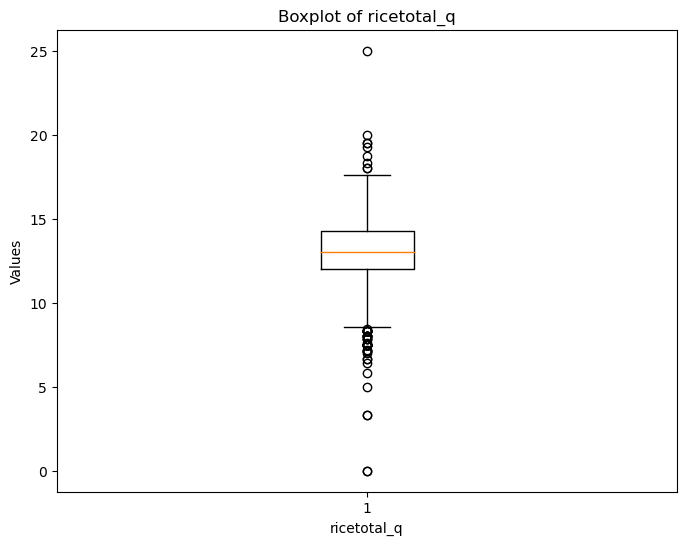

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(NAG_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [28]:
rice1 = NAG_clean['ricetotal_q'].quantile(0.25)
rice2 = NAG_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [30]:
NAG_clean=NAG_new[(NAG_new['ricetotal_q']<=up_limit)&(NAG_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2160cf1b590>,
 'caps': [<matplotlib.lines.Line2D at 0x2160cf1be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2160cf6b690>],
 'medians': [<matplotlib.lines.Line2D at 0x2160cf4bbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2160cf4a890>],
 'means': []}

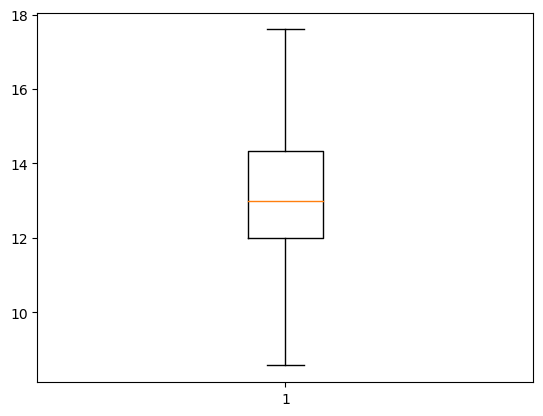

In [32]:
plt.boxplot(NAG_clean['ricetotal_q'])

In [34]:
NAG_clean['District'].unique()

array([ 8,  3,  4,  7,  2,  6,  5,  1,  9, 11, 10], dtype=int64)

In [36]:
NAG_clean.loc[:,'Sector'] = NAG_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [38]:
NAG_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [40]:
NAG_clean.loc[:, 'total_consumption'] = NAG_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\Home\AppData\Local\Temp\ipykernel_24068\2651948859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAG_clean.loc[:, 'total_consumption'] = NAG_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [42]:
NAG_clean.loc[:, 'total_consumption'] = NAG_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [44]:
NAG_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
19822,NAG,8,RURAL,1,131,14.5,0.0,0.000,0,0.000,0.00,24.881525,72.500000,60.0,111.881525
19823,NAG,8,RURAL,1,131,14.0,0.0,0.125,0,0.875,0.00,20.942970,37.500000,56.0,73.442970
19824,NAG,8,RURAL,1,131,14.0,0.0,0.125,0,0.000,0.30,20.250361,22.500000,60.0,57.175361
19825,NAG,8,RURAL,1,131,13.0,0.0,0.000,0,0.250,0.00,16.550338,18.333333,60.0,48.133671
19826,NAG,8,RURAL,1,131,14.4,0.0,0.000,0,0.000,0.08,23.637370,46.000000,60.0,84.117370


In [46]:
NAG_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                
                     std       mean       max        min
Region                                                  
1              27.678464  64.956971  297.7511  23.812569

In [62]:
NAG_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                28.348301  66.333557  182.150175  28.400240
2                23.368328  56.768621  142.013688  31.007257
3                21.769475  57.935552  166.825803  27.900480
4                19.112967  61.343733  123.614750  26.933417
5                25.284798  61.125498  136.208767  26.425189
6                25.908368  63.786629  157.828846  26.850206
7                38.055926  73.969822  297.751100  25.700160
8                30.255402  71.911943  184.855285  33.808413
9                28.826814  66.931339  167.833583  28.900100
10               28.731090  70.755272  166.695387  23.812569
11               21.334216  62.446825  149.313562  24.714596

In [72]:
total_consumption_by_districtname=NAG_clean.groupby('District')['total_consumption'].sum()

In [74]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
7    8358.589899
3    7184.008487
8    6687.810665
Name: total_consumption, dtype: float64

In [80]:
NAG_clean.loc[:,"District"] = NAG_clean.loc[:,"District"].replace({7: "kohima", 3: "Mokukchung", 8: "Phek"})

In [82]:
total_consumption_by_districtname=NAG_clean.groupby('District')['total_consumption'].sum()

In [84]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
kohima        8358.589899
Mokukchung    7184.008487
Phek          6687.810665
Name: total_consumption, dtype: float64

In [86]:
from statsmodels.stats import weightstats as stests

In [90]:
rural=NAG_clean[NAG_clean['Sector']=="RURAL"]
urban=NAG_clean[NAG_clean['Sector']=="URBAN"]

In [92]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
19822,NAG,Phek,RURAL,1,131,14.5,0.0,0.000,0,0.000,0.00,24.881525,72.500000,60.0,111.881525
19823,NAG,Phek,RURAL,1,131,14.0,0.0,0.125,0,0.875,0.00,20.942970,37.500000,56.0,73.442970
19824,NAG,Phek,RURAL,1,131,14.0,0.0,0.125,0,0.000,0.30,20.250361,22.500000,60.0,57.175361
19825,NAG,Phek,RURAL,1,131,13.0,0.0,0.000,0,0.250,0.00,16.550338,18.333333,60.0,48.133671
19826,NAG,Phek,RURAL,1,131,14.4,0.0,0.000,0,0.000,0.08,23.637370,46.000000,60.0,84.117370


In [94]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
50405,NAG,11,URBAN,1,131,12.00,0.0,0.0,0,0.4,0.8,24.420740,30.0,60.0,67.620740
50406,NAG,11,URBAN,1,131,15.00,0.0,0.0,0,0.0,0.4,25.650310,40.0,60.0,81.050310
50407,NAG,11,URBAN,1,131,12.00,0.0,0.0,0,0.4,0.0,21.700660,20.0,60.0,54.100660
50408,NAG,11,URBAN,1,131,15.00,0.0,0.0,0,0.0,0.0,23.600250,40.0,60.0,78.600250
50409,NAG,11,URBAN,1,131,13.75,0.0,0.0,0,0.0,0.0,24.900962,25.0,60.0,63.650962


In [96]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [98]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 1.687589673040713
P-Value: 0.09149002297319402
